<a href="https://colab.research.google.com/github/nidjosep/student-feedback-analysis/blob/master/Model_1_Actionable_Insights_from_Student_Feedback_Sentiment_Analysis_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
import tensorflow as tf
from google.colab import drive


# Download NLTK stopwords
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MCSC/TME_6015/Project/reviews.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mounted at /content/drive


In [89]:
df['text_length'] = df['Review'].apply(len)
df.head()

,Id,Review,Label,text_length
0,0,good and interesting,5,20
1,1,"This class is very helpful to me. Currently, I...",5,121
2,2,like!Prof and TAs are helpful and the discussi...,5,117
3,3,Easy to follow and includes a lot basic and im...,5,81
4,4,Really nice teacher!I could got the point eazl...,4,58


In [90]:
train0=df[df['Label']==0]
train1=df[df['Label']==1]
train2=df[df['Label']==2]
train3=df[df['Label']==3]
train4=df[df['Label']==4]
train5=df[df['Label']==5]
train5.head()

,Id,Review,Label,text_length
0,0,good and interesting,5,20
1,1,"This class is very helpful to me. Currently, I...",5,121
2,2,like!Prof and TAs are helpful and the discussi...,5,117
3,3,Easy to follow and includes a lot basic and im...,5,81
5,5,"Great course - I recommend it for all, especia...",5,75


In [91]:
df=pd.concat([train0,train1,train2,train3,train4,train5],axis=0)
df.head()

,Id,Review,Label,text_length
49,49,This course doesn't contain any new informatio...,1,159
71,71,I do not find very interesting this course. to...,1,186
79,79,A lot of speaking without any sense. Skip it a...,1,56
105,105,This course doesn't contain any new informatio...,1,159
173,173,It's not a course... this is a very short gene...,1,77


In [92]:
# We don't need the Id column. Let's drop it !
df.drop(columns=['Id'],inplace=True)
df.head()


,Review,Label,text_length
49,This course doesn't contain any new informatio...,1,159
71,I do not find very interesting this course. to...,1,186
79,A lot of speaking without any sense. Skip it a...,1,56
105,This course doesn't contain any new informatio...,1,159
173,It's not a course... this is a very short gene...,1,77


In [93]:
#remove hashtags
df['Review'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)
#Remove Mention
df['Review'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)
#Remove URL
df['Review'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

df['Review']=df['Review'].str.lower()
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.head()

,Review,Label,text_length
49,course contain new information. teach excitedl...,1,159
71,find interesting course. many interviews. coul...,1,186
79,lot speaking without sense. skip cost,1,56
105,course contain new information. teach excitedl...,1,159
173,course... short general introduction 3d printing,1,77


In [94]:
word_count = df['Review'].apply(lambda x: len(x.split()))
df['word_count'] = word_count
df.head()

,Review,Label,text_length,word_count
49,course contain new information. teach excitedl...,1,159,14
71,find interesting course. many interviews. coul...,1,186,14
79,lot speaking without sense. skip cost,1,56,6
105,course contain new information. teach excitedl...,1,159,14
173,course... short general introduction 3d printing,1,77,6


In [95]:
import spacy
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


In [96]:
# nltk.download('stopwords')
# ps = PorterStemmer()
# df['Review'] = df['Review'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in set(stopwords.words('english'))]))
import string
# nlp = spacy.load('en_core_web_sm')
# punctuations = string.punctuation
# df['Review'] = df['Review'].apply(lambda x: ' '.join([token.text for token in nlp(x) if not token.is_punct]))

df.head()

,Review,Label,text_length,word_count
49,course contain new information. teach excitedl...,1,159,14
71,find interesting course. many interviews. coul...,1,186,14
79,lot speaking without sense. skip cost,1,56,6
105,course contain new information. teach excitedl...,1,159,14
173,course... short general introduction 3d printing,1,77,6


In [97]:
y = df['Label']
x = df['Review']

In [98]:
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])



vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names_out()
denselist1 = X1.todense().tolist()
train = pd.DataFrame(denselist1, columns=feature_names1)
# splitting the training and testing part from the data
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=0)

In [100]:
x.iloc[0]

'course contain new information. teach excitedly shows commonly known facts.there better ways invest time.'

In [101]:
df.head()


,Review,Label,text_length,word_count
49,course contain new information. teach excitedl...,1,159,14
71,find interesting course. many interviews. coul...,1,186,14
79,lot speaking without sense. skip cost,1,56,6
105,course contain new information. teach excitedl...,1,159,14
173,course... short general introduction 3d printing,1,77,6


In [102]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,Review,Label,text_length,word_count
0,"great course, great professor!!!",4,32,4
1,awesome course starting machine learning.,5,45,5
2,great! love it.,5,17,3
3,good me!!,4,13,2
4,fascinating interesting course. lot fun!,5,56,5


In [103]:
df1 = df.copy()

In [104]:
df1.head()

,Review,Label,text_length,word_count
0,"great course, great professor!!!",4,32,4
1,awesome course starting machine learning.,5,45,5
2,great! love it.,5,17,3
3,good me!!,4,13,2
4,fascinating interesting course. lot fun!,5,56,5


In [105]:
x1 = df1['Review']
y1 = df1['Label']

In [106]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x1.shape[0]):
    corpus.append(x1.iloc[i])
vectorizer_train = CountVectorizer(max_features=5000)
vocabulary_train = vectorizer_train.fit_transform(corpus)
bow = pd.DataFrame(vocabulary_train.toarray(), columns = vectorizer_train.get_feature_names_out())
bow['labelxyz']=df1.Label
bow.head(1)

,01,10,100,101,11,12,13,14,15,16,...,young,younger,your,yourself,youtube,zelikow,zero,zombies,zone,labelxyz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [107]:
bow.head(5)

,01,10,100,101,11,12,13,14,15,16,...,young,younger,your,yourself,youtube,zelikow,zero,zombies,zone,labelxyz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [108]:
from keras.utils import to_categorical

In [109]:
bow_zero = bow[bow.labelxyz == 0]
bow_one = bow[bow.labelxyz == 1]
bow_two = bow[bow.labelxyz == 2]
bow_three = bow[bow.labelxyz == 3]
bow_four = bow[bow.labelxyz == 4]
bow_five = bow[bow.labelxyz == 5]
X_train_zero = bow_zero.sample(frac=0.8, random_state=0)
X_test_zero = bow_zero.drop(X_train_zero.index)
X_train_one = bow_one.sample(frac=0.8, random_state=0)
X_test_one = bow_one.drop(X_train_one.index)
X_train_two = bow_two.sample(frac=0.8, random_state=0)
X_test_two = bow_two.drop(X_train_two.index)
X_train_three = bow_three.sample(frac=0.8, random_state=0)
X_test_three = bow_three.drop(X_train_three.index)
X_train_four = bow_four.sample(frac=0.8, random_state=0)
X_test_four = bow_four.drop(X_train_four.index)
X_train_five = bow_five.sample(frac=0.8, random_state=0)
X_test_five = bow_five.drop(X_train_five.index)
X_train_df = pd.concat([X_train_zero, X_train_one, X_train_two, X_train_three, X_train_four, X_train_five], axis = 0)
bow_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train1 = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_zero, X_test_one, X_test_two, X_test_three, X_test_four, X_test_five], axis = 0)
bow_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test1 = list(X_test_df.labelxyz)
# Convert labels to one-hot encoded format
y_train_encoded = to_categorical(y_train1, num_classes=6)
y_test_encoded = to_categorical(y_test1, num_classes=6)
bow_train, y_train1 = np.array(bow_train), np.array(y_train1)
bow_test, y_test1 = np.array(bow_test), np.array(y_test1)

X_train_df.head()

,01,10,100,101,11,12,13,14,15,16,...,young,younger,your,yourself,youtube,zelikow,zero,zombies,zone,labelxyz
101411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
77224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
91561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Epoch 1/10
2141/2141 [==============================] - 11s 5ms/step - loss: 0.2124 - accuracy: 0.7240 - val_loss: 0.0926 - val_accuracy: 0.9377
Epoch 2/10
2141/2141 [==============================] - 8s 4ms/step - loss: 0.1753 - accuracy: 0.7749 - val_loss: 0.0844 - val_accuracy: 0.9373
Epoch 3/10
2141/2141 [==============================] - 9s 4ms/step - loss: 0.1227 - accuracy: 0.8540 - val_loss: 0.0952 - val_accuracy: 0.9106
Epoch 4/10
2141/2141 [==============================] - 9s 4ms/step - loss: 0.0711 - accuracy: 0.9208 - val_loss: 0.1269 - val_accuracy: 0.8827
Epoch 5/10
2141/2141 [==============================] - 9s 4ms/step - loss: 0.0457 - accuracy: 0.9497 - val_loss: 0.1655 - val_accuracy: 0.8810
Epoch 6/10
2141/2141 [==============================] - 9s 4ms/step - loss: 0.0349 - accuracy: 0.9617 - val_loss: 0.1899 - val_accuracy: 0.8775
Epoch 7/10
2141/2141 [==============================] - 8s 4ms/step - loss: 0.0307 - accuracy: 0.9662 - val_loss: 0.2151 - val_accuracy

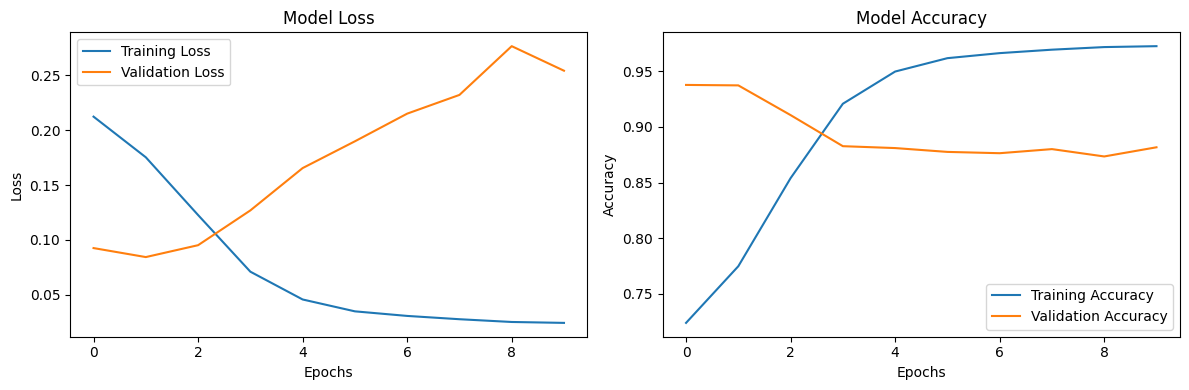

In [110]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(bow_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(bow_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [111]:
df.head(0)

,Review,Label,text_length,word_count


In [121]:
text = "Ok presentation"
text = remove_stop_words(text)
len_text = len(text)
word_count = len(text.split())# Creating a DataFrame
data = {
    'Text': [text],
    'Text_Length': [len_text],
    'Word_Count': [word_count]
}

df = pd.DataFrame(data)

vocabulary_test = vectorizer_train.transform(df['Text'])

# Convert to DataFrame
bow_test = pd.DataFrame(vocabulary_test.toarray(), columns=vectorizer_train.get_feature_names_out())

# Check if the shape matches the expected input shape for your model
print("Shape of the transformed test data:", bow_test.shape)

# If the shape is (1, 1000), you can predict using your model
if bow_test.shape[1] == 5000:
    predictions = model.predict(bow_test.values)
    print(predictions)
    predicted_classes = np.argmax(predictions, axis=1)
    print(predicted_classes)


Shape of the transformed test data: (1, 5000)
1/1 [==============================] - 0s 20ms/step
[[4.07849848e-06 1.76278241e-02 2.80510187e-01 6.34954035e-01
  9.44903716e-02 1.09663196e-01]]
[3]
